COGNITIVE FATIGUE PREDICTION USING AUGMENTED DATASET 
- train dataset 1: Noise Impute Augmented Dataset (NA)
- train dataset 2: Quantized Augmented Dataset (QA)
- test dataset: noise imputed dataset & quantized dataset
- labels: run 1 (0), run 2 (1)
- Feature Selection Technique: Recursive Feature Elimination Technique
- Selected features tested for multicollinearity

In [5]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.utils import shuffle
from scipy import stats
from warnings import filterwarnings
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate 
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
filterwarnings("ignore")

%matplotlib inline

In [6]:
file = 'trainData.csv'
dir = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/Datasets/eyeState/trainDataset/'
dir_1 = dir+file
df_1 = pd.read_csv(dir_1, index_col=False)
df_1.head()
features = df_1.columns.values.tolist()
df_1.drop(['index'], axis=1, inplace=True)
df_1.describe()

,fzRelativeDelta,fzRelativeTheta,fzRelativeAlpha,fzRelativeBeta,fzRelativeGamma,czRelativeDelta,czRelativeTheta,czRelativeAlpha,czRelativeBeta,czRelativeGamma,...,pzRelativeTheta,pzRelativeAlpha,pzRelativeBeta,pzRelativeGamma,globalRelativeDelta,globalRelativeTheta,globalRelativeAlpha,globalRelativeBeta,globalRelativeGamma,labels
count,3834.000000,3834.000000,3834.000000,3834.000000,3834.000000,3834.000000,3834.000000,3834.000000,3834.000000,3834.000000,...,3834.000000,3834.000000,3834.000000,3834.000000,3834.000000,3834.000000,3834.000000,3834.000000,3834.000000,3924.000000
mean,0.167056,0.106071,0.115451,0.179459,0.120023,0.166208,0.106614,0.124671,0.179501,0.117713,...,0.095007,0.132290,0.180084,0.121936,0.163642,0.104440,0.124815,0.177202,0.119234,0.500000
std,0.053761,0.035242,0.048054,0.033794,0.023322,0.052581,0.033410,0.051576,0.036804,0.022694,...,0.032255,0.055381,0.035031,0.023960,0.055272,0.033990,0.052315,0.034291,0.022875,0.500064
min,0.048057,0.047032,0.048280,0.123772,0.072084,0.048593,0.044439,0.048280,0.123608,0.075513,...,0.042322,0.047153,0.123682,0.082603,0.048593,0.042558,0.048249,0.123372,0.079094,0.000000
25%,0.141553,0.084285,0.075326,0.152321,0.105034,0.136192,0.087383,0.079558,0.150857,0.101974,...,0.073441,0.085119,0.152309,0.103758,0.133566,0.083227,0.082111,0.149429,0.103140,0.000000
50%,0.179008,0.107124,0.106626,0.170335,0.115509,0.179110,0.107158,0.116091,0.168563,0.113383,...,0.096869,0.124861,0.171216,0.116285,0.176958,0.105603,0.114544,0.167463,0.114375,0.500000
75%,0.203146,0.126960,0.150613,0.206026,0.129472,0.204859,0.126104,0.165781,0.206366,0.128460,...,0.115101,0.177647,0.205863,0.134672,0.202001,0.126517,0.162361,0.204887,0.129316,1.000000
max,0.267964,0.223022,0.244355,0.291351,0.170436,0.276968,0.225512,0.270732,0.315210,0.170436,...,0.224785,0.262872,0.311532,0.170436,0.276339,0.230093,0.264798,0.274882,0.170436,1.000000


In [7]:
file = 'originalTestData.csv'
dir = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/Datasets/eyeState/trainDataset/'
dir_2 = dir+file
df_2 = pd.read_csv(dir_2, index_col=False)
df_2.head()
features = df_2.columns.values.tolist()
df_2.drop(['index'], axis=1, inplace=True)
df_2.describe()

,fzRelativeDelta,fzRelativeTheta,fzRelativeAlpha,fzRelativeBeta,fzRelativeGamma,czRelativeDelta,czRelativeTheta,czRelativeAlpha,czRelativeBeta,czRelativeGamma,...,pzRelativeTheta,pzRelativeAlpha,pzRelativeBeta,pzRelativeGamma,globalRelativeDelta,globalRelativeTheta,globalRelativeAlpha,globalRelativeBeta,globalRelativeGamma,labels
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,...,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,218.000000
mean,0.332282,0.169983,0.179945,0.152538,0.043958,0.316682,0.168786,0.198201,0.159003,0.043482,...,0.149173,0.236589,0.156524,0.040265,0.318294,0.167145,0.204172,0.154576,0.041533,0.500000
std,0.138819,0.066650,0.111902,0.065743,0.022195,0.126148,0.066404,0.120361,0.067169,0.022294,...,0.059205,0.153373,0.067882,0.020400,0.129476,0.064731,0.126105,0.064528,0.020786,0.501151
min,0.008615,0.004229,0.004404,0.005568,0.001780,0.007120,0.003811,0.003476,0.006810,0.002049,...,0.004762,0.004119,0.006725,0.001997,0.010404,0.005603,0.005285,0.008635,0.002227,0.000000
25%,0.239105,0.130501,0.101022,0.107092,0.029243,0.236162,0.134574,0.111745,0.115919,0.028353,...,0.112241,0.120319,0.114935,0.025209,0.228235,0.131027,0.115079,0.111871,0.027581,0.000000
50%,0.338013,0.166972,0.153950,0.147566,0.040630,0.309056,0.167908,0.160221,0.151719,0.041124,...,0.152997,0.195690,0.147756,0.038468,0.319212,0.163404,0.167760,0.147384,0.038770,0.500000
75%,0.421991,0.211980,0.234835,0.194658,0.054841,0.407520,0.205714,0.269346,0.198273,0.053516,...,0.181063,0.336187,0.194878,0.051324,0.404319,0.208924,0.276565,0.189033,0.051850,1.000000
max,0.816448,0.428804,0.686642,0.400596,0.135373,0.683856,0.517393,0.622883,0.387206,0.159270,...,0.352782,0.680884,0.382970,0.125482,0.758972,0.451037,0.575228,0.370950,0.138651,1.000000


In [8]:
print("Number of classes in noise augmented data")
print('There are only '+ str(len(df_1[df_1.labels == 1])) + ' run 1 scans in the noise augmented dataset')
print('There are only '+ str(len(df_1[df_1.labels == 0])) + ' run 2 scans in the noise augmented dataset')
print("Number of classes in quantized augmented data")
print('There are only '+ str(len(df_2[df_2.labels == 1])) + ' run 1 scans in the quantized augmented dataset')
print('There are only '+ str(len(df_2[df_2.labels == 0])) + ' run 2 scans in the quantized augmented dataset')

Number of classes in noise augmented data
There are only 1962 run 1 scans in the noise augmented dataset
There are only 1962 run 2 scans in the noise augmented dataset
Number of classes in quantized augmented data
There are only 109 run 1 scans in the quantized augmented dataset
There are only 109 run 2 scans in the quantized augmented dataset


In [9]:
X_1,X_2 = df_1.drop(['labels'], axis=1), df_2.drop(['labels'], axis=1)
y_1,y_2 = df_1['labels'], df_2['labels']

4. a. Outlier Detection & Removal using Z-Scores: Noise Augmented Dataset

In [10]:
#   detect 
z_1,z_2 = np.abs(stats.zscore(X_1)) > 3, np.abs(stats.zscore(X_2)) > 3
X_1[z_1],X_2[z_2] = np.nan, np.nan
nullFeatures_10,nullFeatures_20 = X_1.isnull().sum(), X_2.isnull().sum()
print("features with null values in NA dataset: ", nullFeatures_10)
print("features with null values in QA dataset: ", nullFeatures_20)

#   remove 
X_1,X_2 = X_1.fillna(X_1.median()), X_2.fillna(X_2.median())
nullFeatures_11,nullFeatures_21 = X_1.isnull().sum(), X_2.isnull().sum()
print("features with null values in NA dataset:", nullFeatures_11)
print("features with null values in QA dataset:", nullFeatures_21)

features with null values in NA dataset:  fzRelativeDelta        90
fzRelativeTheta        90
fzRelativeAlpha        90
fzRelativeBeta         90
fzRelativeGamma        90
czRelativeDelta        90
czRelativeTheta        90
czRelativeAlpha        90
czRelativeBeta         90
czRelativeGamma        90
pzRelativeDelta        90
pzRelativeTheta        90
pzRelativeAlpha        90
pzRelativeBeta         90
pzRelativeGamma        90
globalRelativeDelta    90
globalRelativeTheta    90
globalRelativeAlpha    90
globalRelativeBeta     90
globalRelativeGamma    90
dtype: int64
features with null values in QA dataset:  fzRelativeDelta        5
fzRelativeTheta        5
fzRelativeAlpha        5
fzRelativeBeta         5
fzRelativeGamma        5
czRelativeDelta        5
czRelativeTheta        5
czRelativeAlpha        5
czRelativeBeta         5
czRelativeGamma        5
pzRelativeDelta        5
pzRelativeTheta        5
pzRelativeAlpha        5
pzRelativeBeta         5
pzRelativeGamma        5
globalRe

5. a. Feature Selection | Recursive Feature Elimination (RFE): Noise Augmented Dataset

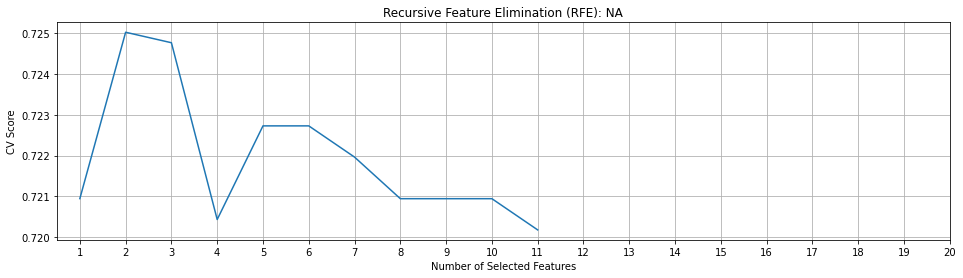

The optimal number of features: 11


In [11]:
#   Utilize RFE to select the best features
estimator = LogisticRegression(random_state=0)
rfecv = RFECV(estimator=estimator, min_features_to_select=10, cv=StratifiedKFold(10, random_state=0, shuffle=True), scoring="accuracy")
rfecv.fit(X_1, y_1)

plt.figure(figsize=(16, 4))
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, X_1.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE): NA")
plt.show()
print("The optimal number of features: {}".format(rfecv.n_features_))

X_rfe_1 = X_1.iloc[:, rfecv.support_]
new_features = X_rfe_1.columns.values.tolist()

5. b. Feature Selection | Recursive Feature Elimination (RFE): Quantized Augmented Dataset

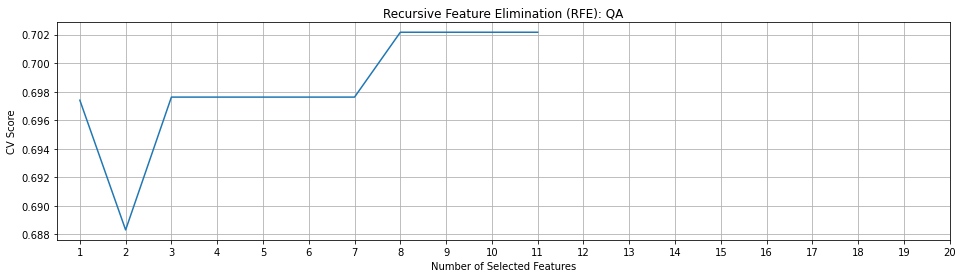

The optimal number of features: 17


In [12]:
#   Utilize RFE to select the best features
estimator = LogisticRegression(random_state=0)
rfecv = RFECV(estimator=estimator, min_features_to_select=10, cv=StratifiedKFold(10, random_state=0, shuffle=True), scoring="accuracy")
rfecv.fit(X_2, y_2)

plt.figure(figsize=(16,4))
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, X_2.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE): QA")
plt.show()
print("The optimal number of features: {}".format(rfecv.n_features_))

X_rfe_2 = X_2.iloc[:, rfecv.support_]
new_features = X_rfe_2.columns.values.tolist()

6. a. MultiCollinearity Test: Noise Augmented Dataset
- check and remove features highly correlated to one another from the RFE-selected features

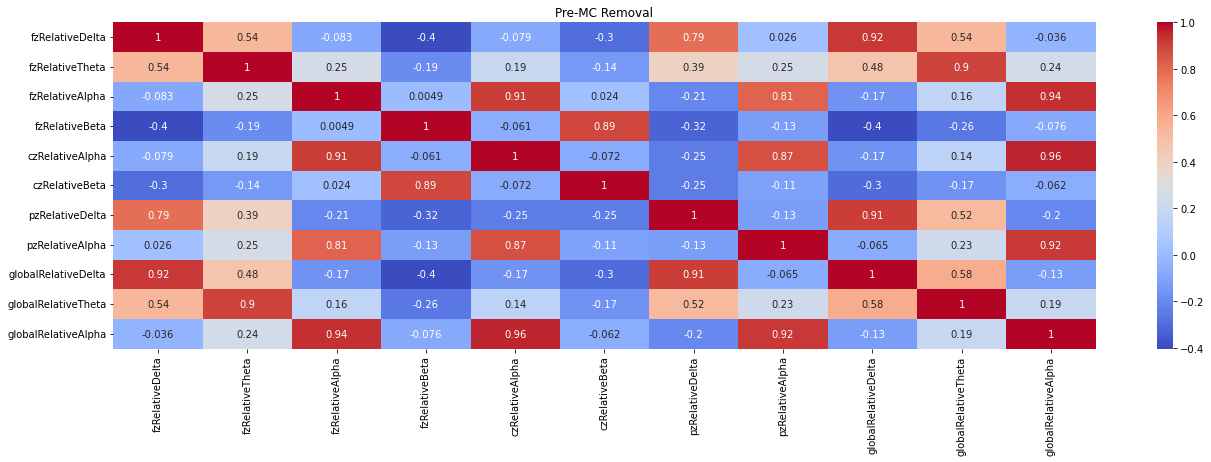

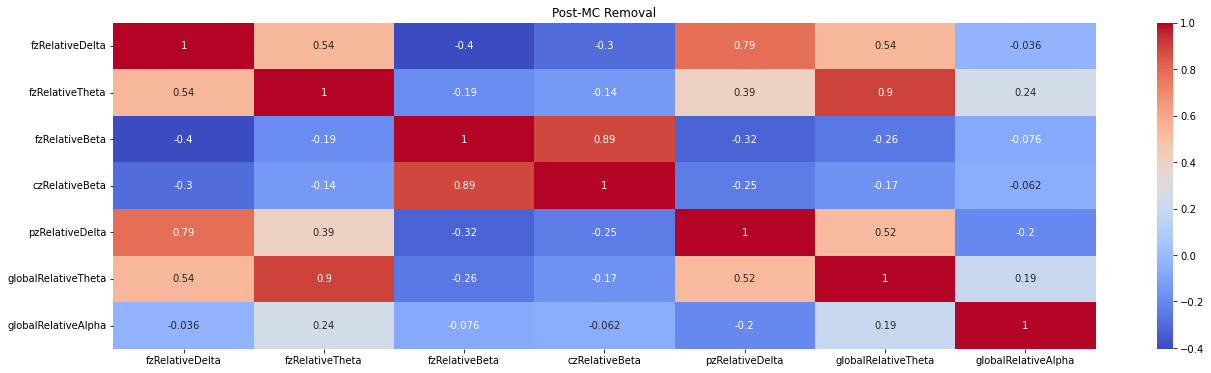

In [13]:
#   correlation plot to view interaction between RFE-selected features
corr = X_rfe_1.corr()
plt.figure(figsize=(22, 6))
seaborn.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Pre-MC Removal')
plt.show()

#   automatically remove multicollinear features
def remove_multicollinear_features(x, threshold):
    y = x.corr().abs().unstack()
    y = y.sort_values(kind="quicksort", ascending=False)
    y = y[y != 1]
    y = y[y > threshold]
    y = pd.DataFrame(y).reset_index()
    y.columns = ['feature_1', 'feature_2', 'corr']
    to_drop = []
    for i in range(len(y)):
        if y['feature_1'][i] not in to_drop:
            to_drop.append(y['feature_2'][i])
    return to_drop

to_drop = remove_multicollinear_features(X_rfe_1, 0.9)
X_rfe_1 = X_rfe_1.drop(to_drop, axis=1)
new_features = X_rfe_1.columns.values.tolist()

#  check for multicollinearity amongst new features
corr = X_rfe_1.corr()
plt.figure(figsize=(22, 6))
seaborn.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Post-MC Removal')
plt.show()

6. b. MultiCollinearity Test: Quantize Augmented Dataset
- check and remove features highly correlated to one another from the RFE-selected features

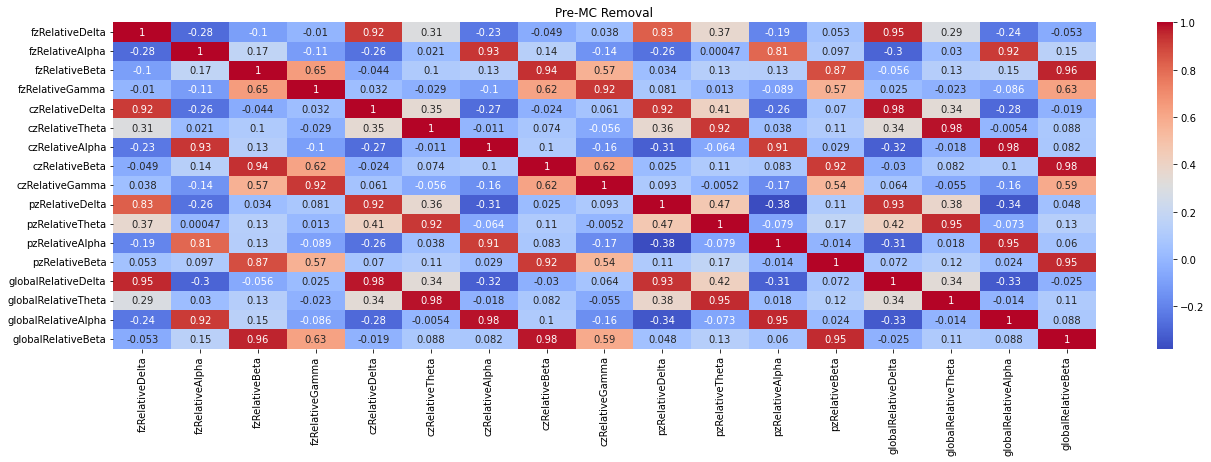

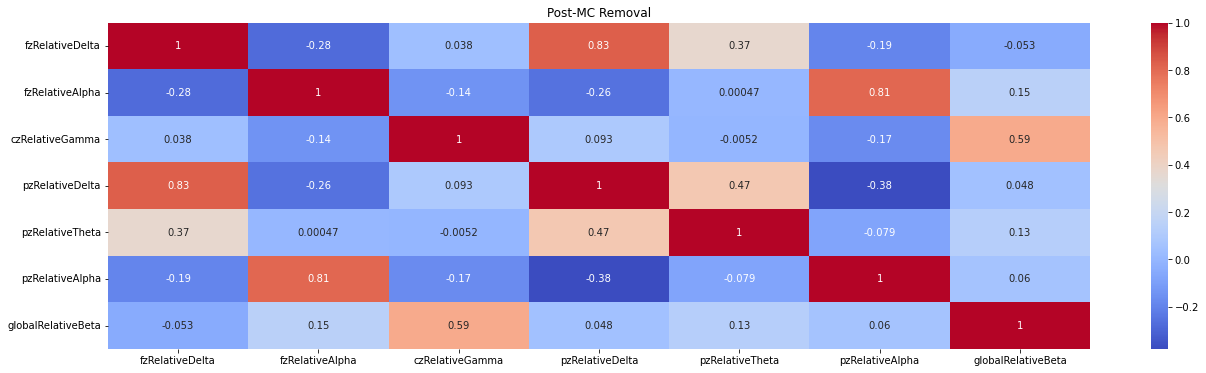

In [14]:
#   correlation plot to view interaction between RFE-selected features
corr = X_rfe_2.corr()
plt.figure(figsize=(22, 6))
seaborn.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Pre-MC Removal')
plt.show()

to_drop = remove_multicollinear_features(X_rfe_2, 0.9)
X_rfe_2 = X_rfe_2.drop(to_drop, axis=1)
new_features = X_rfe_2.columns.values.tolist()

#  check for multicollinearity amongst new features
corr = X_rfe_2.corr()
plt.figure(figsize=(22, 6))
seaborn.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Post-MC Removal')
plt.show()

7. Train-Test Split for noise augmented datasets

In [15]:
X_train_1, X_test_1, X_rfe_train_1, X_rfe_test_1, y_train_1, y_test_1 = train_test_split(X_1, X_rfe_1, y_1,train_size=0.8,random_state=0)
X_train_2, X_test_2, X_rfe_train_2, X_rfe_test_2, y_train_2, y_test_2 = train_test_split(X_2, X_rfe_2, y_2,train_size=0.8,random_state=0)

print("Noise Augmented Train data size: {}".format(len(y_train_1)))
print("Noise Augmented Test data size: {}".format(len(y_test_1)))
print("Quantized Augmented Train data size: {}".format(len(y_train_2)))
print("Quantized Augmented Test data size: {}".format(len(y_test_2)))

Noise Augmented Train data size: 3139
Noise Augmented Test data size: 785
Quantized Augmented Train data size: 174
Quantized Augmented Test data size: 44


8. a. Scale both the training and test datasets: NA

In [16]:
scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train_1)
X_test_1 = scaler.transform(X_test_1)
X_rfe_train_1 = scaler.fit_transform(X_rfe_train_1)
X_rfe_test_1 = scaler.transform(X_rfe_test_1)

8. b. Scale both the training and test datasets: QA

In [17]:
scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)
X_rfe_train_2 = scaler.fit_transform(X_rfe_train_2)
X_rfe_test_2 = scaler.transform(X_rfe_test_2)

9. a. Multiple Classifiers: Noise Augmented data

In [18]:
random_state = 0

clf_keys_1 = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
            "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
clf_values_1 = [LogisticRegression(random_state=random_state), SVC(kernel="linear", random_state=random_state),
              GaussianNB(), KNeighborsClassifier(), SGDClassifier(random_state=random_state),
              DecisionTreeClassifier(random_state=random_state), AdaBoostClassifier(random_state=random_state), 
              MLPClassifier(random_state=random_state, max_iter=1000)]
clf_rfe_keys_1 = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
                "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
clf_rfe_values_1 = [LogisticRegression(random_state=random_state), SVC(kernel="linear",random_state=random_state),
                  GaussianNB(), KNeighborsClassifier(), SGDClassifier(random_state=random_state),
                  DecisionTreeClassifier(random_state=random_state), AdaBoostClassifier(random_state=random_state), 
                  MLPClassifier(random_state=random_state, max_iter=1000)]
clfs_1 = dict(zip(clf_keys_1, clf_values_1))
clfs_rfe_1 = dict(zip(clf_rfe_keys_1, clf_rfe_values_1))

# Original noise aug. dataset
print("Model training using original noise aug. data: started!")
for clf_name_1, clf_1 in clfs_1.items():
    clf_1.fit(X_train_1, y_train_1)
    clfs_1[clf_name_1] = clf_1
    print(clf_name_1, "training: done!")
print("Model training using original noise aug. data: done!\n")

# Feature-selected noise aug. dataset
print("Model training using feature-selected noise aug. data: started!")
for clf_rfe_name_1, clf_rfe_1 in clfs_rfe_1.items():
    clf_rfe_1.fit(X_rfe_train_1, y_train_1)
    clfs_rfe_1[clf_rfe_name_1] = clf_rfe_1
    print(clf_rfe_name_1, "training: done!")
print("Model training using feature-selected noise aug. data: done!")

Model training using original noise aug. data: started!
Logistic Regression training: done!
Support Vector Machine training: done!
Naive Bayes training: done!
k-Nearest Neighbors training: done!
Stochastic Gradient Descent training: done!
Decision Tree training: done!
AdaBoost training: done!
Multi-layer Perceptron training: done!
Model training using original noise aug. data: done!

Model training using feature-selected noise aug. data: started!
Logistic Regression training: done!
Support Vector Machine training: done!
Naive Bayes training: done!
k-Nearest Neighbors training: done!
Stochastic Gradient Descent training: done!
Decision Tree training: done!
AdaBoost training: done!
Multi-layer Perceptron training: done!
Model training using feature-selected noise aug. data: done!


9. b. Multiple Classifiers: Quantized Augmented data

In [ ]:
clf_keys_2 = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
            "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
clf_values_2 = [LogisticRegression(random_state=random_state), SVC(kernel="linear", random_state=random_state),
              GaussianNB(), KNeighborsClassifier(), SGDClassifier(random_state=random_state),
              DecisionTreeClassifier(random_state=random_state), AdaBoostClassifier(random_state=random_state), 
              MLPClassifier(random_state=random_state, max_iter=1000)]
clf_rfe_keys_2 = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
                "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
clf_rfe_values_2 = [LogisticRegression(random_state=random_state), SVC(kernel="linear",random_state=random_state),
                  GaussianNB(), KNeighborsClassifier(), SGDClassifier(random_state=random_state),
                  DecisionTreeClassifier(random_state=random_state), AdaBoostClassifier(random_state=random_state), 
                  MLPClassifier(random_state=random_state, max_iter=1000)]
clfs_2 = dict(zip(clf_keys_2, clf_values_2))
clfs_rfe_2 = dict(zip(clf_rfe_keys_2, clf_rfe_values_2))

# Original quantized aug. dataset
print("Model training using original quantized aug. data: started!")
for clf_name_2, clf_2 in clfs_2.items():
    clf_2.fit(X_train_2, y_train_2)
    clfs_2[clf_name_2] = clf_2
    print(clf_name_2, "training: done!")
print("Model training using original quantized aug. data: done!\n")

# Feature-selected quantized aug. dataset
print("Model training using feature-selected quantized aug. data: started!")
for clf_rfe_name_2, clf_rfe_2 in clfs_rfe_2.items():
    clf_rfe_2.fit(X_rfe_train_2, y_train_2)
    clfs_rfe_2[clf_rfe_name_2] = clf_rfe_2
    print(clf_rfe_name_2, "training: done!")
print("Model training using feature-selected quantized aug. data: done!")

10. Accuracy of models 

In [ ]:
# Original noise aug. dataset
acc_1 = []
for clf_name_1, clf_1 in clfs_1.items():
    y_pred_1 = clf_1.predict(X_test_1)
    acc_1.append(accuracy_score(y_test_1, y_pred_1))

# Feature-selected noise aug. dataset
acc_rfe_1 = []
for clf_rfe_name_1, clf_rfe_1 in clfs_rfe_1.items():
    y_rfe_pred_1 = clf_rfe_1.predict(X_rfe_test_1)
    acc_rfe_1.append(accuracy_score(y_test_1, y_rfe_pred_1))

acc_all_1 = pd.DataFrame({"Original NA dataset": acc_1, "Feature-selected NA. dataset": acc_rfe_1},index=clf_keys_1)
display(acc_all_1)

# Original quantized aug. dataset
acc_2 = []
for clf_name_2, clf_2 in clfs_2.items():
    y_pred_2 = clf_2.predict(X_test_2)
    acc_2.append(accuracy_score(y_test_2, y_pred_2))

# Feature-selected quantized aug. dataset
acc_rfe_2 = []
for clf_rfe_name_2, clf_rfe_2 in clfs_rfe_2.items():
    y_rfe_pred_2 = clf_rfe_2.predict(X_rfe_test_2)
    acc_rfe_2.append(accuracy_score(y_test_2, y_rfe_pred_2))

acc_all_2 = pd.DataFrame({"Original QA dataset": acc_2, "Feature-selected QA dataset": acc_rfe_2},index=clf_keys_2)
display(acc_all_2)

10. Bar plot of all accuracy results to visualize them.

In [ ]:
print("Mean Accuracy: Noise Augmented\n" + acc_all_1.mean().to_string())
print("Standard Deviation Accuracy: Noise Augmented\n" + acc_all_1.std().to_string())

ax = acc_all_1.plot.bar(figsize=(10, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x()*0.985, p.get_height()*1.002))
plt.ylim((0,1))
plt.xticks(rotation=90)
plt.title("All Classifier Accuracies: Noise Augmented")
plt.grid()
plt.show()

print("Mean Accuracy: Quantize Augmented\n" + acc_all_2.mean().to_string())
print("Standard Deviation Accuracy: Quantize Augmented\n" + acc_all_2.std().to_string())

ax = acc_all_2.plot.bar(figsize=(10, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x()*0.985, p.get_height()*1.002))
plt.ylim((0,1))
plt.xticks(rotation=90)
plt.title("All Classifier Accuracies: Quantize Augmented")
plt.grid()
plt.show()

11. a. Confusion Matrix: Noise Aug. 

In [ ]:
# confusion matrix for original dataset without feature selection: Noise Augmented
fig, axes = plt.subplots(2,4, figsize=(12,6))
fig.suptitle("Test Dataset (All features): Noise Augmented", fontsize=14)
for clf_name_1, clf_1, ax in zip(clf_keys_1, clf_values_1, axes.flatten()):
    y_pred_1 = clf_1.predict(X_test_1)
    cm = confusion_matrix(y_test_1, y_pred_1)
    ax = seaborn.heatmap(cm, annot=True, ax=ax, fmt='g', cbar=False)
    ax.set_title(clf_name_1)
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])
    for ax in axes.flat:
        ax.set(xlabel='Predicted labels', ylabel='True labels')
    for ax in axes.flat:
        ax.label_outer()
plt.tight_layout()
plt.show()

# confusion matrix for original dataset with feature-selection: Noise Augmented
fig, axes = plt.subplots(2,4, figsize=(12,6))
fig.suptitle("Test Dataset (Features Selected): Noise Augmented", fontsize=14)
for clf_rfe_name_1, clf_rfe_1, ax in zip(clf_rfe_keys_1, clf_rfe_values_1, axes.flatten()):
    y_rfe_pred_1 = clf_rfe_1.predict(X_rfe_test_1)
    cm = confusion_matrix(y_test_1, y_rfe_pred_1)
    ax = seaborn.heatmap(cm, annot=True, ax=ax, fmt='g', cbar=False)
    ax.set_title(clf_rfe_name_1)
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])
    for ax in axes.flat:
        ax.set(xlabel='Predicted labels', ylabel='True labels')
    for ax in axes.flat:
        ax.label_outer()
plt.tight_layout()
plt.show()

11. b. Confusion Matrix: Quantized Aug. 

In [ ]:
# confusion matrix for original dataset without feature selection: Quantize Augmented
fig, axes = plt.subplots(2,4, figsize=(12,6))
fig.suptitle("Test Dataset (All features): Quantize Augmented", fontsize=14)
for clf_name_2, clf_2, ax in zip(clf_keys_2, clf_values_2, axes.flatten()):
    y_pred_2 = clf_2.predict(X_test_2)
    cm = confusion_matrix(y_test_2, y_pred_2)
    ax = seaborn.heatmap(cm, annot=True, ax=ax, fmt='g', cbar=False)
    ax.set_title(clf_name_2)
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])
    for ax in axes.flat:
        ax.set(xlabel='Predicted labels', ylabel='True labels')
    for ax in axes.flat:
        ax.label_outer()
plt.tight_layout()
plt.show()

# confusion matrix for original dataset with feature-selection: Quantize Augmented
fig, axes = plt.subplots(2,4, figsize=(12,6))
fig.suptitle("Test Dataset (Features Selected): Quantize Augmented", fontsize=14)
for clf_rfe_name_2, clf_rfe_2, ax in zip(clf_rfe_keys_2, clf_rfe_values_2, axes.flatten()):
    y_rfe_pred_2 = clf_rfe_2.predict(X_rfe_test_2)
    cm = confusion_matrix(y_test_2, y_rfe_pred_2)
    ax = seaborn.heatmap(cm, annot=True, ax=ax, fmt='g', cbar=False)
    ax.set_title(clf_rfe_name_2)
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])
    for ax in axes.flat:
        ax.set(xlabel='Predicted labels', ylabel='True labels')
    for ax in axes.flat:
        ax.label_outer()
plt.tight_layout()
plt.show()

12. Overfitting Detection using CV on both Datasets
- Validate the accuracy result and evaluate the performance of these two models furthermore
- do k-fold cross-validation with  𝑘=10 on the whole dataset. 
- Metrics to validate is accuracy.

In [ ]:
scoring = ["accuracy", "roc_auc"]
random_state = 0

scores = []
# Original dataset: NA
print("Cross-validation on original NA data: started!")
for clf_name_1, clf_1 in clfs_1.items():
    score = pd.DataFrame(cross_validate(clf_1, X_1, y_1, cv=StratifiedKFold(10, random_state=random_state, shuffle=True), scoring=scoring)).mean()
    scores.append(score)
    print(clf_name_1, "cross-validation: done!")
cv_scores_1 = pd.concat(scores, axis=1).rename(columns=dict(zip(range(len(clf_keys_1)), clf_keys_1)))
print("Cross-validation on original NA data: done!\n")

scores = []
# Feature-selected dataset: NA
print("Cross-validation on feature-selected NA data: started!")
for clf_name_1, clf_1 in clfs_rfe_1.items():
    score = pd.DataFrame(cross_validate(clf_1, X_rfe_1, y_1, cv=StratifiedKFold(10, random_state=random_state, shuffle=True), scoring=scoring)).mean()
    scores.append(score)
    print(clf_name_1, "cross-validation: done!")
cv_scores_rfe_1 = pd.concat(scores, axis=1).rename(columns=dict(zip(range(len(clf_keys_1)), clf_keys_1)))
print("Cross-validation on feature-selected NA data: done!")

scores = []
# Original dataset: QA
print("Cross-validation on original QA data: started!")
for clf_name_2, clf_2 in clfs_2.items():
    score = pd.DataFrame(cross_validate(clf_2, X_2, y_2, cv=StratifiedKFold(10, random_state=random_state, shuffle=True), scoring=scoring)).mean()
    scores.append(score)
    print(clf_name_2, "cross-validation: done!")
cv_scores_2 = pd.concat(scores, axis=1).rename(columns=dict(zip(range(len(clf_keys_2)), clf_keys_2)))
print("Cross-validation on original QA data: done!\n")

scores = []
# Feature-selected dataset: QA
print("Cross-validation on feature-selected QA data: started!")
for clf_name_2, clf_2 in clfs_rfe_2.items():
    score = pd.DataFrame(cross_validate(clf_2, X_rfe_2, y_2, cv=StratifiedKFold(10, random_state=random_state, shuffle=True), scoring=scoring)).mean()
    scores.append(score)
    print(clf_name_2, "cross-validation: done!")
cv_scores_rfe_2 = pd.concat(scores, axis=1).rename(columns=dict(zip(range(len(clf_keys_2)), clf_keys_2)))
print("Cross-validation on feature-selected QA data: done!")

13. Visualize cross-validation accuracy

In [ ]:
# Accuracy: NA
cv_acc_all_1 = pd.concat([cv_scores_1.loc["test_accuracy"].rename("Original data"), cv_scores_rfe_1.loc["test_accuracy"].rename("Feature-selected data")], 
                       axis=1)

print(" Mean of Cross-validation accuracy: NA\n" + cv_acc_all_1.mean().to_string())
print("Standard Deviation of Cross-validation accuracy: NA\n" + cv_acc_all_1.std().to_string())

ax = cv_acc_all_1.plot.bar(figsize=(10, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x()*0.985, p.get_height()*1.003))
plt.xticks(rotation=90)
plt.ylim((0,1))
plt.title("Cross-validation Accuracy: NA")
plt.grid()
plt.legend()
plt.show()


# Accuracy: QA
cv_acc_all_2 = pd.concat([cv_scores_2.loc["test_accuracy"].rename("Original data"), cv_scores_rfe_2.loc["test_accuracy"].rename("Feature-selected data")],
                          axis=1)   

print(" Mean of Cross-validation accuracy: QA\n" + cv_acc_all_2.mean().to_string())
print("Standard Deviation of Cross-validation accuracy: QA\n" + cv_acc_all_2.std().to_string())
ax = cv_acc_all_2.plot.bar(figsize=(10, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x()*0.985, p.get_height()*1.003))
plt.xticks(rotation=90)
plt.ylim((0,1))
plt.title("Cross-validation Accuracy: QA")
plt.grid()
plt.legend()
plt.show()